In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
globalsea = pd.read_csv("sealevel.csv")
globalsea

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
...,...,...,...,...,...,...,...,...,...
1043,2021,334929.31,49.26,85.01,49.78,56.17,84.76,56.69,60.49
1044,2021,338042.09,50.49,85.94,49.66,57.42,85.65,56.57,60.56
1045,2021,337369.81,49.65,84.02,49.58,56.57,83.78,56.50,60.53
1046,2021,335464.09,47.46,82.66,49.54,54.41,82.45,56.46,60.36


Checking Data

In [4]:
globalsea.head()

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21


In [5]:
globalsea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         1048 non-null   int64  
 1   TotalWeightedObservations    1048 non-null   float64
 2   GMSL_noGIA                   1048 non-null   float64
 3   StdDevGMSL_noGIA             1048 non-null   float64
 4   SmoothedGSML_noGIA           1048 non-null   float64
 5   GMSL_GIA                     1048 non-null   float64
 6   StdDevGMSL_GIA               1048 non-null   float64
 7   SmoothedGSML_GIA             1048 non-null   float64
 8   SmoothedGSML_GIA_sigremoved  1048 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 73.8 KB


In [6]:
globalsea.dtypes

Year                             int64
TotalWeightedObservations      float64
GMSL_noGIA                     float64
StdDevGMSL_noGIA               float64
SmoothedGSML_noGIA             float64
GMSL_GIA                       float64
StdDevGMSL_GIA                 float64
SmoothedGSML_GIA               float64
SmoothedGSML_GIA_sigremoved    float64
dtype: object

In [7]:
globalsea.select_dtypes(include='object').nunique()

Series([], dtype: float64)

In [8]:
globalsea.describe()

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,2006.742366,326568.269981,4.645515,87.007700,4.702004,8.112557,87.062805,8.168273,8.213044
std,8.231978,28044.226934,26.351001,5.525201,26.171990,28.310139,5.557840,28.138879,27.976127
min,1993.000000,906.100000,-44.390000,77.410000,-39.780000,-43.140000,77.420000,-39.770000,-39.110000
25%,2000.000000,327418.897500,-18.250000,83.510000,-17.882500,-16.615000,83.617500,-16.087500,-17.440000
50%,2007.000000,331979.205000,1.930000,85.925000,1.505000,5.465000,85.935000,5.065000,5.170000
75%,2014.000000,335243.865000,25.857500,88.602500,26.115000,30.942500,88.732500,31.095000,29.697500
max,2021.000000,341335.090000,57.920000,118.720000,56.310000,64.390000,118.760000,63.070000,60.560000


In [10]:
globalsea.isnull().sum()

Year                           0
TotalWeightedObservations      0
GMSL_noGIA                     0
StdDevGMSL_noGIA               0
SmoothedGSML_noGIA             0
GMSL_GIA                       0
StdDevGMSL_GIA                 0
SmoothedGSML_GIA               0
SmoothedGSML_GIA_sigremoved    0
dtype: int64

In [11]:
globalsea.shape

(1048, 9)

Penjelasan Data
1. Col1 - Year
2. Col2 - Total Weighted Observations
3. Col3 - GMSL (Global Isostatic Adjustment (GIA) not applied) variation (mm) with respect to 20-year TOPEX/Jason collinear mean reference
4. Col4 - Standard Deviation of GMSL (GIA not applied) variation estimate (mm)
5. Col5 - Smoothed (60-day Gaussian type filter) GMSL (GIA not applied) variation (mm)
6. Col6 - GMSL (Global Isostatic Adjustment (GIA) applied) variation (mm) with respect to 20-year TOPEX/Jason collinear mean reference
7. Col7 - Standard deviation of GMSL (GIA applied) variation estimate (mm)
8. Col8 - Smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm)
9. Col9 - Smoothed (60-day Gaussian type filter) GMSL (GIA applied) variation (mm); annual and semi-annual signal removed 

In [17]:
globalsea = pd.read_csv("sealevel.csv")
globalsea

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
...,...,...,...,...,...,...,...,...,...
1043,2021,334929.31,49.26,85.01,49.78,56.17,84.76,56.69,60.49
1044,2021,338042.09,50.49,85.94,49.66,57.42,85.65,56.57,60.56
1045,2021,337369.81,49.65,84.02,49.58,56.57,83.78,56.50,60.53
1046,2021,335464.09,47.46,82.66,49.54,54.41,82.45,56.46,60.36


In [18]:
globalsea.head()

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21


In [20]:
globalsea.rename(columns={"Year": "Tahun","TotalWeightedObservations": "TWO"}, inplace=True)
globalsea

,Tahun,TWO,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
...,...,...,...,...,...,...,...,...,...
1043,2021,334929.31,49.26,85.01,49.78,56.17,84.76,56.69,60.49
1044,2021,338042.09,50.49,85.94,49.66,57.42,85.65,56.57,60.56
1045,2021,337369.81,49.65,84.02,49.58,56.57,83.78,56.50,60.53
1046,2021,335464.09,47.46,82.66,49.54,54.41,82.45,56.46,60.36


In [23]:
def no_and_gia(dataframe):
    return dataframe.iloc[:,[0,1,2,5]]
tren_gmsl = no_and_gia(globalsea)
tren_gmsl

,Tahun,TWO,GMSL_noGIA,GMSL_GIA
0,1993,327401.31,-38.59,-38.59
1,1993,324498.41,-41.97,-41.97
2,1993,333018.19,-41.93,-41.91
3,1993,297483.19,-42.67,-42.65
4,1993,321635.81,-37.86,-37.83
...,...,...,...,...
1043,2021,334929.31,49.26,56.17
1044,2021,338042.09,50.49,57.42
1045,2021,337369.81,49.65,56.57
1046,2021,335464.09,47.46,54.41


Analisis Tren Perubahan

In [24]:
from scipy.stats import linregress

In [26]:
#  Menghitung regresi linier untuk GMSL dengan GIA
x = globalsea["Tahun"]
y_with_GIA = globalsea["GMSL_GIA"]
slope_with_GIA, intercept_with_GIA, _, _, _ = linregress(x, y_with_GIA)
print(f"Regresi Linier dengan GIA: Kecepatan Perubahan = {slope_with_GIA:.2f} mm/tahun")


Regresi Linier dengan GIA: Kecepatan Perubahan = 3.36 mm/tahun


In [27]:
# Menghitung regresi linier untuk GMSL tanpa GIA
y_without_GIA = globalsea["GMSL_noGIA"]
slope_without_GIA, intercept_without_GIA, _, _, _ = linregress(x, y_without_GIA)
print(f"Regresi Linier tanpa GIA: Kecepatan Perubahan = {slope_without_GIA:.2f} mm/tahun")

Regresi Linier tanpa GIA: Kecepatan Perubahan = 3.12 mm/tahun


In [28]:
# Menghitung deviasi standar tren dengan GIA
trend_with_GIA = intercept_with_GIA + slope_with_GIA * x
std_deviation_with_GIA = np.std(y_with_GIA - trend_with_GIA)
print(f"Deviasi Standar Tren dengan GIA: {std_deviation_with_GIA:.2f} mm")


Deviasi Standar Tren dengan GIA: 6.05 mm


In [29]:
# Menghitung deviasi standar tren tanpa GIA
trend_without_GIA = intercept_without_GIA + slope_without_GIA * x
std_deviation_without_GIA = np.std(y_without_GIA - trend_without_GIA)
print(f"Deviasi Standar Tren tanpa GIA: {std_deviation_without_GIA:.2f} mm")

Deviasi Standar Tren tanpa GIA: 6.02 mm


In [36]:
trend_difference = (intercept_with_GIA + slope_with_GIA * x) - (intercept_without_GIA + slope_without_GIA * x)
print(f"Perbedaan antara tren dengan GIA dan tanpa GIA: {trend_difference.max():.2f} mm")

Perbedaan antara tren dengan GIA dan tanpa GIA: 6.93 mm


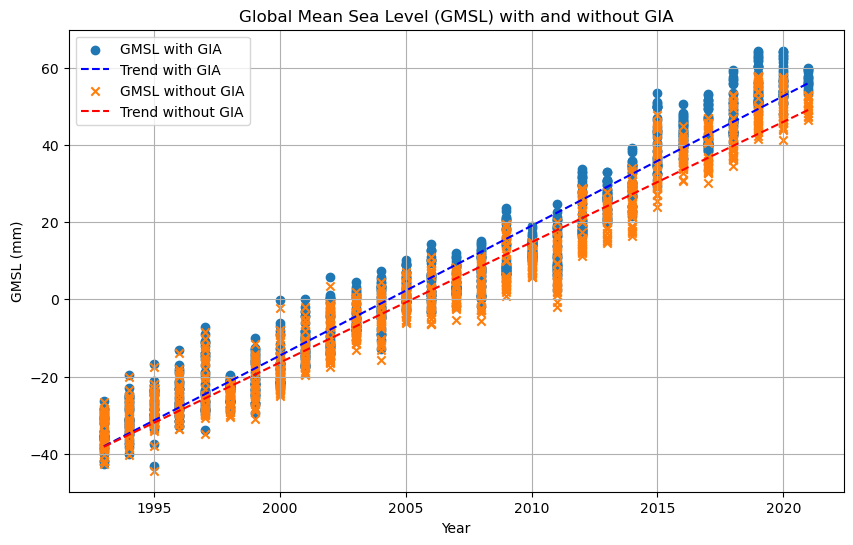

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y_with_GIA, label='GMSL with GIA', marker='o')
plt.plot(x, intercept_with_GIA + slope_with_GIA * x, color='blue', linestyle='--', label='Trend with GIA')

plt.scatter(x, y_without_GIA, label='GMSL without GIA', marker='x')
plt.plot(x, intercept_without_GIA + slope_without_GIA * x, color='red', linestyle='--', label='Trend without GIA')

plt.xlabel('Year')
plt.ylabel('GMSL (mm)')
plt.legend()
plt.title('Global Mean Sea Level (GMSL) with and without GIA')
plt.grid(True)
plt.show()

Deviasi Standar, Spektrum Daya Frekuensi, dan melakukan Analisis Harmonik

In [38]:
deviasi_standar_noGIA = globalsea["SmoothedGSML_noGIA"].std()
print(f"Deviasi Standar SmoothedGSML_noGIA: {deviasi_standar_noGIA:.2f} mm")

# Menghitung Deviasi Standar untuk kolom SmoothedGSML_GIA
deviasi_standar_GIA = globalsea["SmoothedGSML_GIA"].std()
print(f"Deviasi Standar SmoothedGSML_GIA: {deviasi_standar_GIA:.2f} mm")

Deviasi Standar SmoothedGSML_noGIA: 26.17 mm
Deviasi Standar SmoothedGSML_GIA: 28.14 mm


# Analisis Frekuensi

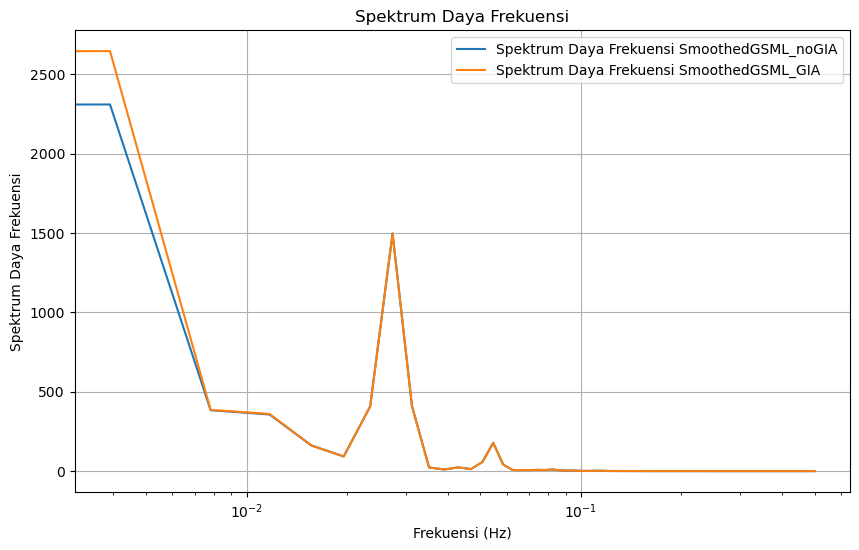

In [40]:
from scipy.signal import welch
import matplotlib.pyplot as plt

# Menggunakan metode Welch untuk menghitung spektrum daya frekuensi
frequencies_noGIA, power_noGIA = welch(globalsea["SmoothedGSML_noGIA"])
frequencies_GIA, power_GIA = welch(globalsea["SmoothedGSML_GIA"])

# Plot spektrum daya frekuensi
plt.figure(figsize=(10, 6))
plt.semilogx(frequencies_noGIA, power_noGIA, label='Spektrum Daya Frekuensi SmoothedGSML_noGIA')
plt.semilogx(frequencies_GIA, power_GIA, label='Spektrum Daya Frekuensi SmoothedGSML_GIA')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Spektrum Daya Frekuensi')
plt.legend()
plt.grid(True)
plt.title('Spektrum Daya Frekuensi')
plt.show()


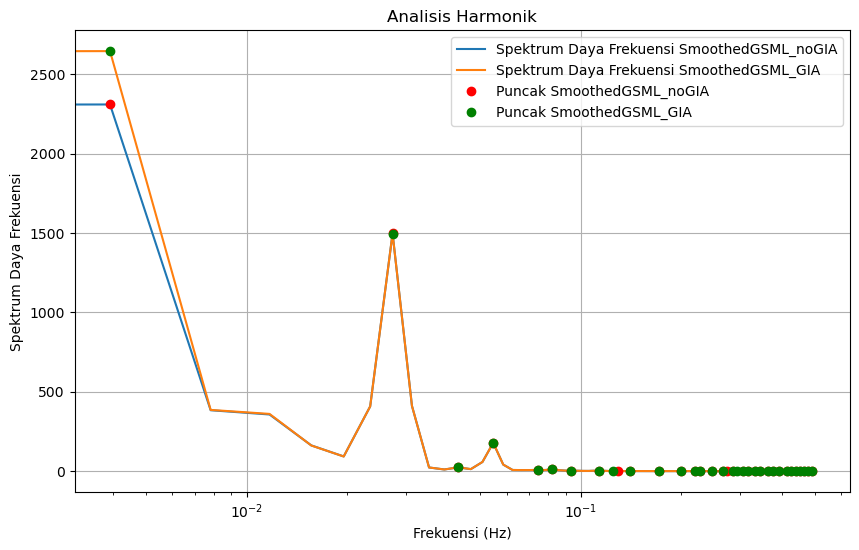

In [41]:
from scipy.signal import find_peaks

# Mencari puncak dalam spektrum daya frekuensi untuk mengidentifikasi sinyal tahunan dan semi-tahunan
peaks_noGIA, _ = find_peaks(power_noGIA)
peaks_GIA, _ = find_peaks(power_GIA)

# Plot hasil analisis harmonik
plt.figure(figsize=(10, 6))
plt.semilogx(frequencies_noGIA, power_noGIA, label='Spektrum Daya Frekuensi SmoothedGSML_noGIA')
plt.semilogx(frequencies_GIA, power_GIA, label='Spektrum Daya Frekuensi SmoothedGSML_GIA')
plt.plot(frequencies_noGIA[peaks_noGIA], power_noGIA[peaks_noGIA], 'ro', label='Puncak SmoothedGSML_noGIA')
plt.plot(frequencies_GIA[peaks_GIA], power_GIA[peaks_GIA], 'go', label='Puncak SmoothedGSML_GIA')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Spektrum Daya Frekuensi')
plt.legend()
plt.grid(True)
plt.title('Analisis Harmonik')
plt.show()


# Analisis Distribusi

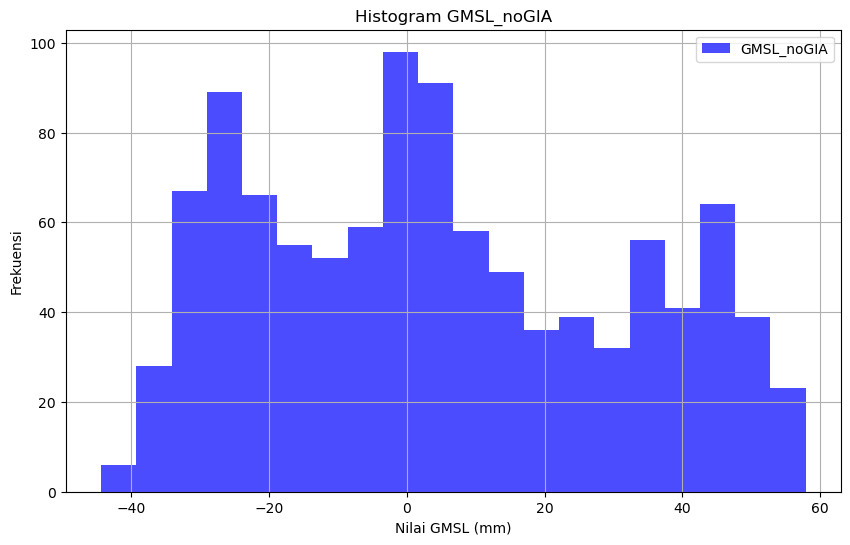

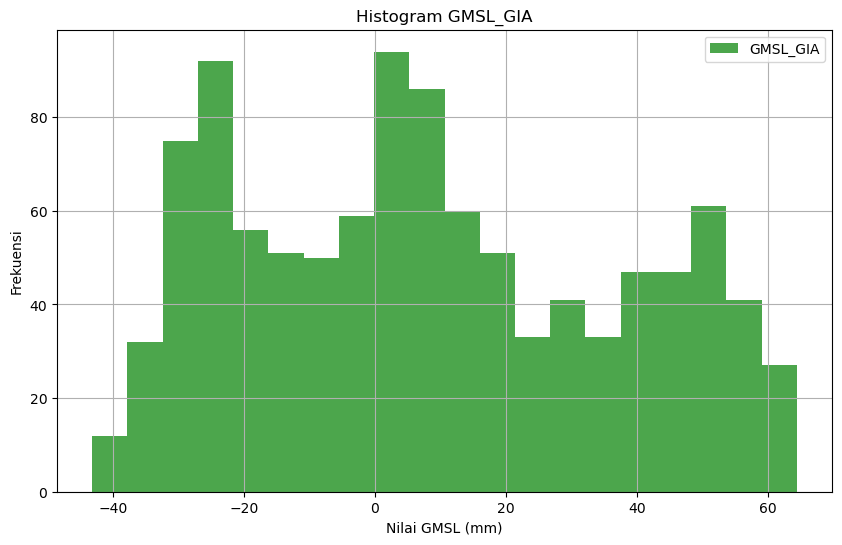

In [43]:
import matplotlib.pyplot as plt

# Menampilkan histogram untuk GMSL_noGIA
plt.figure(figsize=(10, 6))
plt.hist(globalsea["GMSL_noGIA"], bins=20, color='blue', alpha=0.7, label='GMSL_noGIA')
plt.xlabel('Nilai GMSL (mm)')
plt.ylabel('Frekuensi')
plt.legend()
plt.title('Histogram GMSL_noGIA')
plt.grid(True)
plt.show()

# Menampilkan histogram untuk GMSL_GIA
plt.figure(figsize=(10, 6))
plt.hist(globalsea["GMSL_GIA"], bins=20, color='green', alpha=0.7, label='GMSL_GIA')
plt.xlabel('Nilai GMSL (mm)')
plt.ylabel('Frekuensi')
plt.legend()
plt.title('Histogram GMSL_GIA')
plt.grid(True)
plt.show()


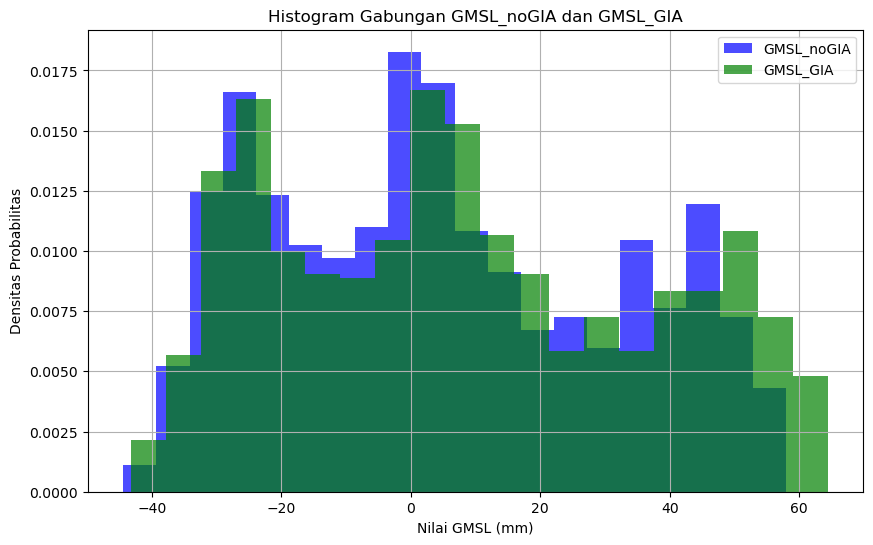

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(globalsea["GMSL_noGIA"], bins=20, color='blue', alpha=0.7, label='GMSL_noGIA', density=True)
plt.hist(globalsea["GMSL_GIA"], bins=20, color='green', alpha=0.7, label='GMSL_GIA', density=True)
plt.xlabel('Nilai GMSL (mm)')
plt.ylabel('Densitas Probabilitas')
plt.legend()
plt.title('Histogram Gabungan GMSL_noGIA dan GMSL_GIA')
plt.grid(True)
plt.show()

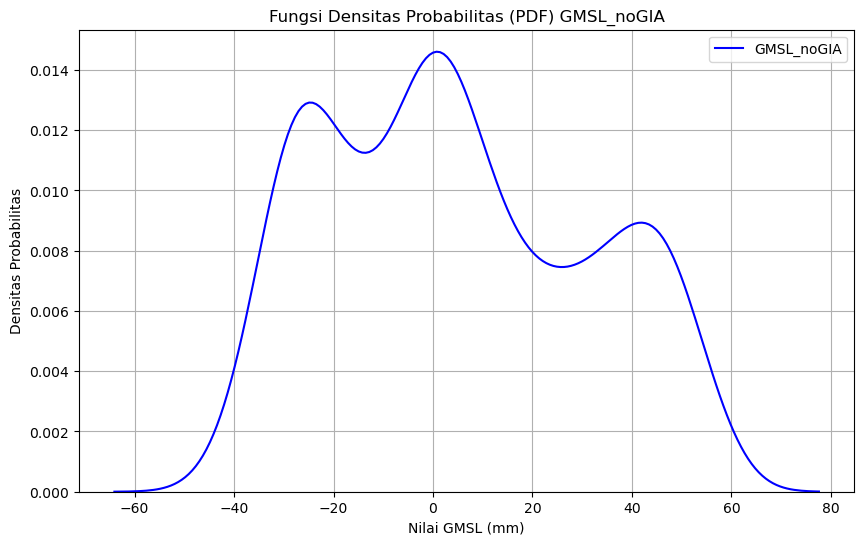

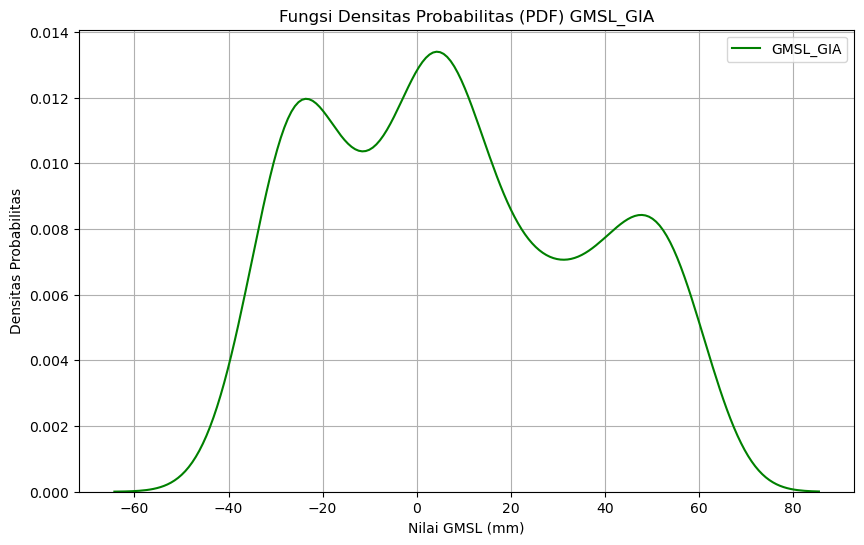

In [47]:
import seaborn as sns

# Menampilkan fungsi densitas probabilitas (PDF) untuk GMSL_noGIA
plt.figure(figsize=(10, 6))
sns.kdeplot(globalsea["GMSL_noGIA"], color='blue', label='GMSL_noGIA')
plt.xlabel('Nilai GMSL (mm)')
plt.ylabel('Densitas Probabilitas')
plt.legend()
plt.title('Fungsi Densitas Probabilitas (PDF) GMSL_noGIA')
plt.grid(True)
plt.show()

# Menampilkan fungsi densitas probabilitas (PDF) untuk GMSL_GIA
plt.figure(figsize=(10, 6))
sns.kdeplot(globalsea["GMSL_GIA"], color='green', label='GMSL_GIA')
plt.xlabel('Nilai GMSL (mm)')
plt.ylabel('Densitas Probabilitas')
plt.legend()
plt.title('Fungsi Densitas Probabilitas (PDF) GMSL_GIA')
plt.grid(True)
plt.show()


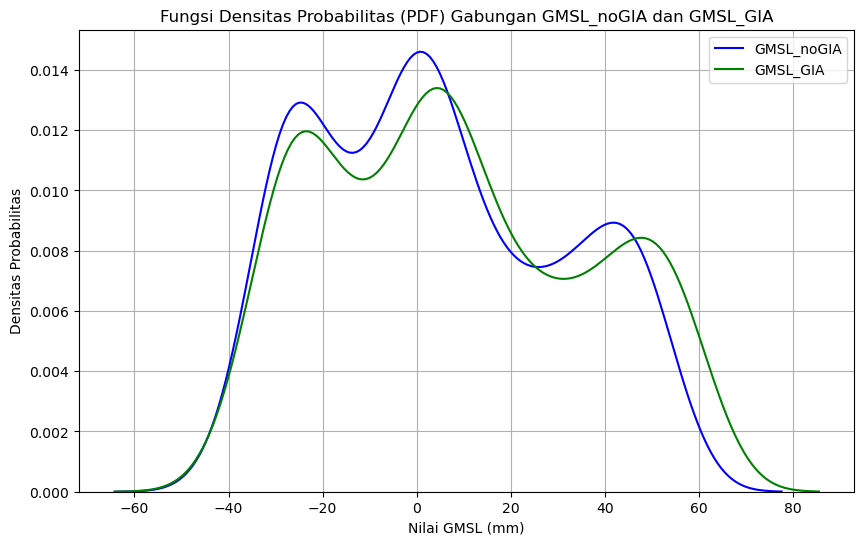

In [49]:
plt.figure(figsize=(10, 6))
sns.kdeplot(globalsea["GMSL_noGIA"], color='blue', label='GMSL_noGIA')
sns.kdeplot(globalsea["GMSL_GIA"], color='green', label='GMSL_GIA')
plt.xlabel('Nilai GMSL (mm)')
plt.ylabel('Densitas Probabilitas')
plt.legend()
plt.title('Fungsi Densitas Probabilitas (PDF) Gabungan GMSL_noGIA dan GMSL_GIA')
plt.grid(True)
plt.show()

Nilai PDF GMSL_noGIA pada titik-titik tertentu: [0.0116229  0.00795599 0.00764803]
Nilai PDF GMSL_GIA pada titik-titik tertentu: [0.01236661 0.00859854 0.00708016]


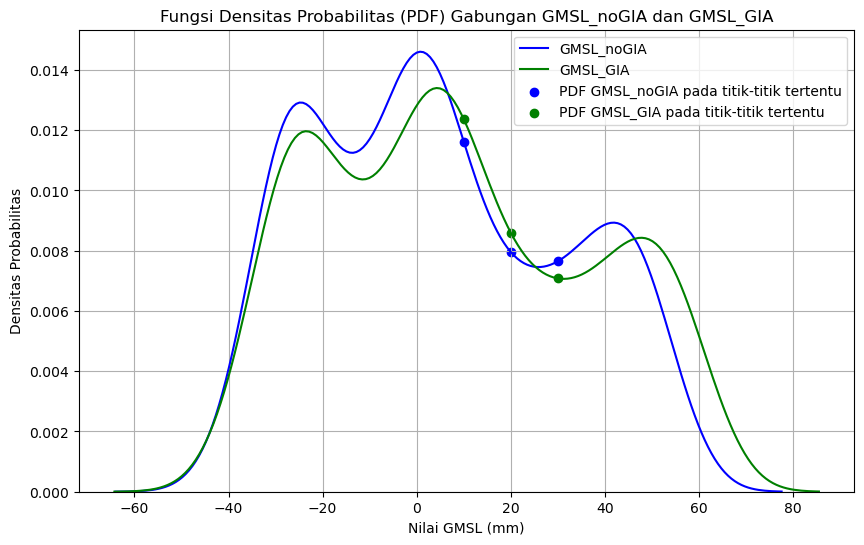

In [52]:
from scipy.stats import gaussian_kde
#Menghitung PDF untuk GMSL_noGIA
pdf_noGIA = gaussian_kde(globalsea["GMSL_noGIA"])
# Menghitung PDF untuk GMSL_GIA
pdf_GIA = gaussian_kde(globalsea["GMSL_GIA"])

# Nilai titik-titik PDF yang ingin Anda hitung
nilai_x = [10.0, 20.0, 30.0]

# Menghitung nilai PDF pada titik-titik tertentu
nilai_pdf_noGIA = pdf_noGIA(nilai_x)
nilai_pdf_GIA = pdf_GIA(nilai_x)
print("Nilai PDF GMSL_noGIA pada titik-titik tertentu:", nilai_pdf_noGIA)
print("Nilai PDF GMSL_GIA pada titik-titik tertentu:", nilai_pdf_GIA)

# Menampilkan fungsi densitas probabilitas (PDF) gabungan untuk GMSL_noGIA dan GMSL_GIA
plt.figure(figsize=(10, 6))
sns.kdeplot(globalsea["GMSL_noGIA"], color='blue', label='GMSL_noGIA')
sns.kdeplot(globalsea["GMSL_GIA"], color='green', label='GMSL_GIA')
plt.scatter(nilai_x, nilai_pdf_noGIA, color='blue', label='PDF GMSL_noGIA pada titik-titik tertentu')
plt.scatter(nilai_x, nilai_pdf_GIA, color='green', label='PDF GMSL_GIA pada titik-titik tertentu')
plt.xlabel('Nilai GMSL (mm)')
plt.ylabel('Densitas Probabilitas')
plt.legend()
plt.title('Fungsi Densitas Probabilitas (PDF) Gabungan GMSL_noGIA dan GMSL_GIA')
plt.grid(True)
plt.show()

In [54]:
# Menghitung rata-rata dan deviasi standar untuk GMSL_noGIA
mean_noGIA = globalsea["GMSL_noGIA"].mean()
std_noGIA = globalsea["GMSL_noGIA"].std()
print(f"Statistik GMSL_noGIA: Rata-rata = {mean_noGIA:.2f} mm, Deviasi Standar = {std_noGIA:.2f} mm")

# Menghitung rata-rata dan deviasi standar untuk GMSL_GIA
mean_GIA = globalsea["GMSL_GIA"].mean()
std_GIA = globalsea["GMSL_GIA"].std()
print(f"Statistik GMSL_GIA: Rata-rata = {mean_GIA:.2f} mm, Deviasi Standar = {std_GIA:.2f} mm")


Statistik GMSL_noGIA: Rata-rata = 4.65 mm, Deviasi Standar = 26.35 mm
Statistik GMSL_GIA: Rata-rata = 8.11 mm, Deviasi Standar = 28.31 mm


# Analisis Perubahan

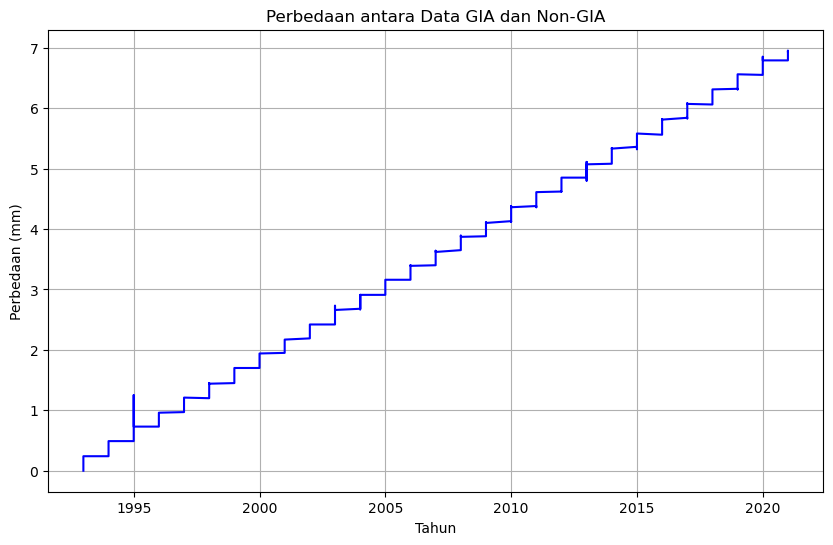

In [58]:
# Menghitung perbedaan antara data GIA dan Non-GIA
globalsea["Perbedaan_GIA_vs_NonGIA"] = globalsea["GMSL_GIA"] - globalsea["GMSL_noGIA"]
plt.figure(figsize=(10, 6))
plt.plot(globalsea["Tahun"], globalsea["Perbedaan_GIA_vs_NonGIA"], color='blue')
plt.xlabel('Tahun')
plt.ylabel('Perbedaan (mm)')
plt.title('Perbedaan antara Data GIA dan Non-GIA')
plt.grid(True)
plt.show()

In [59]:
tren_GIA = np.polyfit(globalsea["Tahun"], globalsea["GMSL_GIA"], 1)

# Menghitung tren data Non-GIA
tren_NonGIA = np.polyfit(globalsea["Tahun"], globalsea["GMSL_noGIA"], 1)

# Menampilkan perbandingan tren
print(f"Tren GMSL_GIA: {tren_GIA[0]:.4f} mm/tahun")
print(f"Tren GMSL_noGIA: {tren_NonGIA[0]:.4f} mm/tahun")

Tren GMSL_GIA: 3.3594 mm/tahun
Tren GMSL_noGIA: 3.1164 mm/tahun


In [60]:
from scipy import stats

# Melakukan uji t untuk menilai signifikansi perbedaan antara GMSL_GIA dan GMSL_noGIA
t_stat, p_value = stats.ttest_rel(globalsea["GMSL_GIA"], globalsea["GMSL_noGIA"])

# Menampilkan hasil uji t
print(f"Uji T-Statistik: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Mengecek signifikansi
alpha = 0.05  # Tingkat signifikansi yang diinginkan
if p_value < alpha:
    print("Perbedaan signifikan (Reject H0)")
else:
    print("Tidak ada perbedaan signifikan (Fail to Reject H0)")


Uji T-Statistik: 56.0488
P-Value: 0.0000
Perbedaan signifikan (Reject H0)
